In [29]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


<br>
<br>

# `1. Root finding Method:`

<br>
<br>


### 1. Bisection:

In [ ]:

df = pd.DataFrame(columns=["a","b","fn(a)","fn(b)","c=(a+b)/2","f(c)"])

def fn(x):
    #return 3*x - np.cos(x) - 1 
    return x**2 -2 

def bisection(a,b,i,tol=1e-6):
    if (fn(a)*fn(b)) >= 0:
        print("choose the another value of a,b")
        return 
    
    c = (a+b)/2 
    
    #val:
    val = {"a":a,"b":b,"fn(a)":fn(a),"fn(b)":fn(b),"c=(a+b)/2":c,"f(c)":fn(c)}
    df.loc[i] = val 
    
    if (a==b) or abs(a-b)<tol or abs(c)<tol:
        return c
    elif fn(a)*fn(c)<=0:
        return bisection(a=a,b=c,i=i+1)
    else:
        return bisection(a=c,b=b,i=i+1)
    
a = 1
b = 2
i = 1
ans = bisection(a,b,i)
ans 


1.4142136573791504

In [31]:
df

,a,b,fn(a),fn(b),c=(a+b)/2,f(c)
1,1.000000,2.000000,-1.000000,2.000000,1.500000,2.500000e-01
2,1.000000,1.500000,-1.000000,0.250000,1.250000,-4.375000e-01
3,1.250000,1.500000,-0.437500,0.250000,1.375000,-1.093750e-01
4,1.375000,1.500000,-0.109375,0.250000,1.437500,6.640625e-02
5,1.375000,1.437500,-0.109375,0.066406,1.406250,-2.246094e-02
6,1.406250,1.437500,-0.022461,0.066406,1.421875,2.172852e-02
7,1.406250,1.421875,-0.022461,0.021729,1.414062,-4.272461e-04
8,1.414062,1.421875,-0.000427,0.021729,1.417969,1.063538e-02
9,1.414062,1.417969,-0.000427,0.010635,1.416016,5.100250e-03
10,1.414062,1.416016,-0.000427,0.005100,1.415039,2.335548e-03


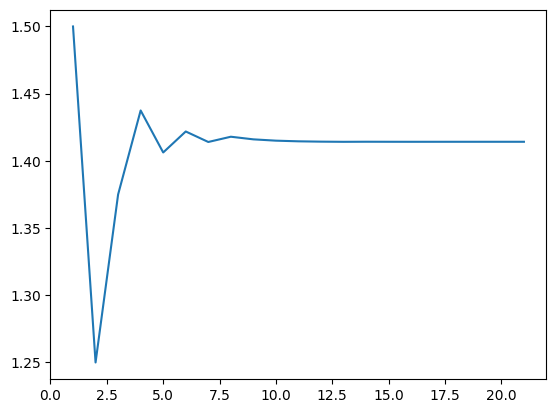

In [33]:


plt.plot(df.index,df["c=(a+b)/2"])
plt.show()


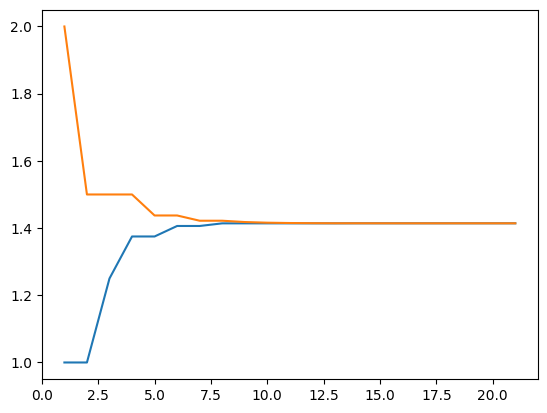

In [35]:

plt.plot(df.index,df["a"])
plt.plot(df.index,df["b"])
plt.show()


### 2. False Position Method:


In [36]:

df = pd.DataFrame(columns=["a","b","fn(a)","fn(b)","((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))","f(c)"])


def fn(x):
    #return x**2 -2 
    return 3*x - np.cos(x) - 1 

def bisection(a,b,i,tol=1e-6):
    if (fn(a)*fn(b)) >= 0:
        print("choose the another value of a,b")
        return 
    
    c = ((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))
    
    #val:
    val = {"a":a,"b":b,"fn(a)":fn(a),"fn(b)":fn(b),
           "((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))":c,"f(c)":fn(c)}
    df.loc[i] = val 
    
    if (a==b) or abs(a-b)<tol or abs(c)<tol:
        return c
    elif fn(a)*fn(c)<=0:
        return bisection(a=a,b=c,i=i+1)
    else:
        return bisection(a=c,b=b,i=i+1)
    
a = 0
b = 1
i = 1
ans = bisection(a,b,i)
ans.item()

0.6071017106443578

(1.0, 20.0)

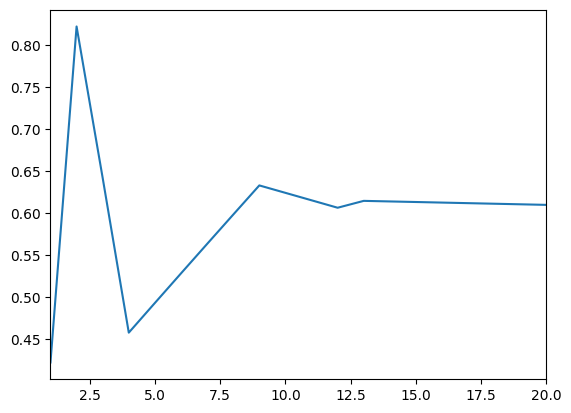

In [37]:

plt.plot(df.index,df["((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))"])
plt.xlim(1,20)

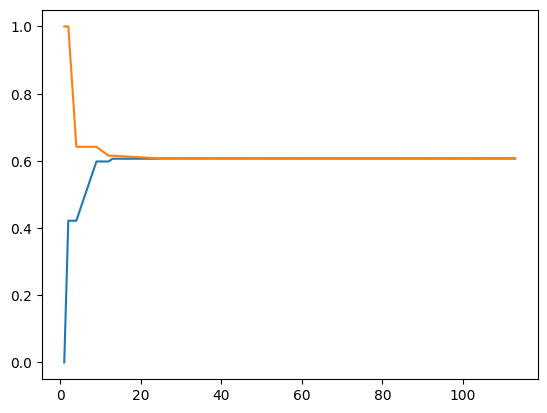

In [38]:

plt.plot(df.index,df["a"])
plt.plot(df.index,df["b"])
plt.show()


### 3. One Point Iteration Method:


In [39]:

df = pd.DataFrame(columns=["x_val"])

# given equation: f(x) = X^3 - 4X + 1 = 0 then,
# x = (X^3 +1)/4 
def fx(x):
    return x**3 - 4*x + 1 

def gx(x):
    return (x**3 +1 )/4 


def iteration_method(x0,tolerance=1e-6,max_iteration=1000):
    x = x0 
    for i in range(max_iteration):
        x_new = gx(x)
        if abs(x_new-x)<tolerance:
            return x_new
        df.loc[i+1] = {"x_val":x_new}
        x = x_new 
    return 

# initial value:
x0 = 0.5 
ans = iteration_method(x0=x0)
ans 

0.2541016964433702

In [40]:
df

,x_val
1,0.281250
2,0.255562
3,0.254173
4,0.254105
5,0.254102


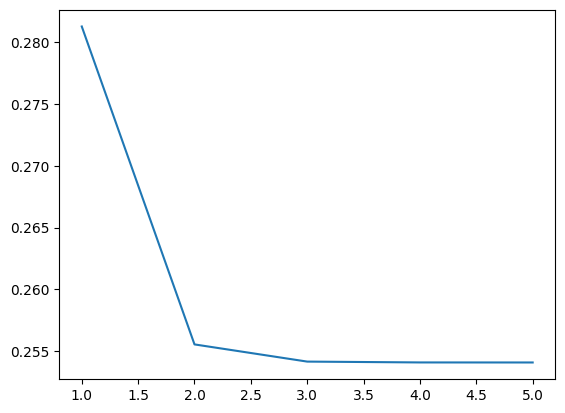

In [42]:

plt.plot(df.index,df["x_val"])
plt.show()



### 4. Newton Rapson:


root is: 1.4142135623730951


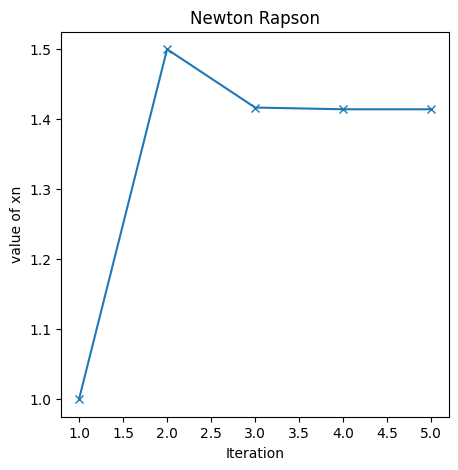

In [10]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


df = pd.DataFrame(columns=["xn","f(xn)","f(f`(xn))","X_N - (f(xn/f`(xn)))"])



def fn(x):
    return x**2 - 2 

def dnf(x):
    return 2*x

i = 0
def newton_rapson(x0,i=1,tol=1e-6,max_iter=100):
    fx = fn(x0)
    dfx = dnf(x0)
    x1 = x0 - (fx/dfx)
    val = {"xn":x0,"f(xn)":fx,"f(f`(xn))":dfx,"X_N - (f(xn/f`(xn)))":x1}
    df.loc[i] = val
    
    #stoping condition:
    if abs(x1-x0) <tol or i>max_iter:
        print(f"root is: {x1}")
        return x1
    else:
        newton_rapson(x1,i+1)
        

x0 = 1
root = newton_rapson(x0)  

plt.figure(figsize=(5,5))
plt.plot(df.index,df["xn"],marker='x')   
plt.title("Newton Rapson")
plt.xlabel("Iteration") 
plt.ylabel("value of xn")
plt.show()


In [11]:
df

,xn,f(xn),f(f`(xn)),X_N - (f(xn/f`(xn)))
1,1.000000,-1.000000e+00,2.000000,1.500000
2,1.500000,2.500000e-01,3.000000,1.416667
3,1.416667,6.944444e-03,2.833333,1.414216
4,1.414216,6.007305e-06,2.828431,1.414214
5,1.414214,4.510614e-12,2.828427,1.414214


<br>
<br>

# `2. Numerial Intregration:`

<br>
<br>



### 1. Trapizoidal:

In [12]:


def fn(x):
    return x**2 

df = pd.DataFrame(columns=["i","x_i","f(x_i)"])

def trapizoidal_rule(a,b,fn,n):
    del_x = (b-a)/n
    for i in range(n+1):
        x_i = a + i * del_x 
        fxi = fn(x_i)
        val = {"i":i,"x_i":x_i,"f(x_i)":fxi}
        df.loc[i] = val
    
    fx_values = df["f(x_i)"]
    result = (del_x/2) * (fx_values.iloc[0] + 2*fx_values.iloc[1:-1].sum() + fx_values.iloc[-1])
    
    return result.item()


a = 0
b = 2
n = 10
ans = trapizoidal_rule(a,b,fn,n)
ans



2.6800000000000006

In [13]:
df

,i,x_i,f(x_i)
0,0,0.0,0.00
1,1,0.2,0.04
2,2,0.4,0.16
3,3,0.6,0.36
4,4,0.8,0.64
5,5,1.0,1.00
6,6,1.2,1.44
7,7,1.4,1.96
8,8,1.6,2.56
9,9,1.8,3.24


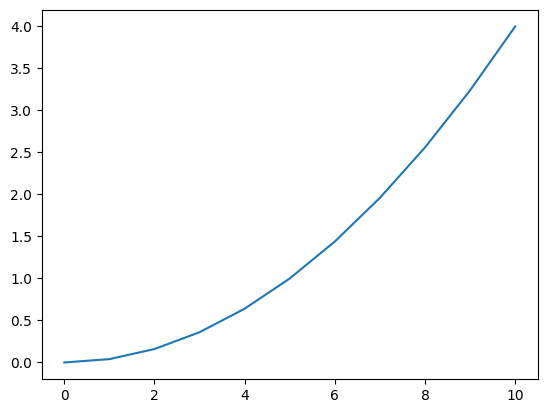

In [14]:
plt.plot(df['i'],df["f(x_i)"])



### 2. Simpons Rule:


In [15]:


df = pd.DataFrame(columns=["i","x_i","f(x_i)"])

def fx(x):
    return x**2

def simpons_rules(a,b,n,fx):
    
    if n % 2 != 0:
        raise ValueError("Simpson's rule requires n to be even.")
    
    del_x = (b-a)/n
    
    for i in range(n+1):
        x_i = a + (i*del_x)
        fxi = fx(x_i)
        val = {"i":i,"x_i":x_i,"f(x_i)":fxi}
        df.loc[i] = val 
    
    values = df["f(x_i)"]
    result = (del_x/3)* (values.iloc[0]+(4*values.iloc[1:-1:2].sum()) + (2*values.iloc[2:-1:2].sum())+values.iloc[-1])
    return result.item()


a = 0
b = 2 
n = 10
ans = simpons_rules(a,b,n,fx)
ans
    

2.6666666666666665

In [16]:
df

,i,x_i,f(x_i)
0,0,0.0,0.00
1,1,0.2,0.04
2,2,0.4,0.16
3,3,0.6,0.36
4,4,0.8,0.64
5,5,1.0,1.00
6,6,1.2,1.44
7,7,1.4,1.96
8,8,1.6,2.56
9,9,1.8,3.24


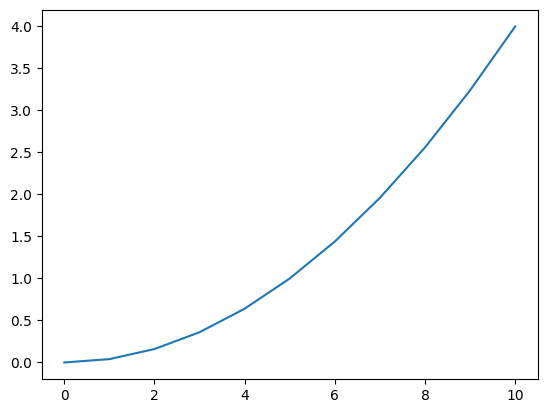

In [17]:
plt.plot(df['i'],df["f(x_i)"])
plt.show()

<br>
<br>

# `3. Interpolation Method:`

<br>
<br>



### 1. Newton Forward:

In [22]:
import math 

def newton_forward(x, y, value):
    n = len(x)
    h = x[1] - x[0]
    
    # Dataframe from Difference Table
    df = pd.DataFrame(np.zeros((n, n)), columns=[f"Δ^{i}y" if i>0 else "y" for i in range(n)])
    df["x"] = x
    df["y"] = y
    df = df[["x", "y"] + [f"Δ^{i}y" for i in range(1, n)]]
    df.iloc[:,1] = y

    # difference columns
    for j in range(1, n):
        for i in range(n - j):
            df.iloc[i, j+1] = df.iloc[i+1, j] - df.iloc[i, j]
    
    
    u = (value - x[0]) / h
    result = y[0]
    u_term = 1
    for i in range(1, n):
        u_term *= (u - (i-1))
        result += (u_term * df.iloc[0, i+1]) / math.factorial(i)
    
    return result, df

# Example
x = np.array([0, 10, 20, 30, 40])
y = np.array([0, 0.1736, 0.3420, 0.5, 0.6428]) 
value = 25

ans, df = newton_forward(x, y, value)

print(f"Newton Forward Interpolation Result at x={value} = {ans:.6f}\n")
print(df)


Newton Forward Interpolation Result at x=25 = 0.422609

    x       y    Δ^1y    Δ^2y    Δ^3y    Δ^4y
0   0  0.0000  0.1736 -0.0052 -0.0052  0.0004
1  10  0.1736  0.1684 -0.0104 -0.0048  0.0000
2  20  0.3420  0.1580 -0.0152  0.0000  0.0000
3  30  0.5000  0.1428  0.0000  0.0000  0.0000
4  40  0.6428  0.0000  0.0000  0.0000  0.0000



### 2. Newton Backward

In [23]:

def newton_backward(x, y, value):
    n = len(x)
    h = x[1] - x[0]
    
    # Create Backward Difference Table
    df = pd.DataFrame(np.zeros((n, n)), columns=[f"∇^{i}y" if i>0 else "y" for i in range(n)])
    df["x"] = x
    df["y"] = y
    df = df[["x", "y"] + [f"∇^{i}y" for i in range(1, n)]]
    df.iloc[:,1] = y

    # Fill backward differences
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            df.iloc[i, j+1] = df.iloc[i, j] - df.iloc[i-1, j]
    
    # Compute result
    u = (value - x[-1]) / h
    result = y[-1]
    u_term = 1
    for i in range(1, n):
        u_term *= (u + (i-1))
        result += (u_term * df.iloc[-1, i+1]) / math.factorial(i)
    
    return result, df

# Example
x = np.array([0, 10, 20, 30, 40])
y = np.array([0, 0.1736, 0.3420, 0.5, 0.6428])
value = 25

ans_b, df_b = newton_backward(x, y, value)
print(f"Newton Backward Interpolation Result at x={value} = {ans_b:.6f}\n")
print(df_b)


Newton Backward Interpolation Result at x=25 = 0.422609

    x       y    ∇^1y    ∇^2y    ∇^3y    ∇^4y
0   0  0.0000  0.0000  0.0000  0.0000  0.0000
1  10  0.1736  0.1736  0.0000  0.0000  0.0000
2  20  0.3420  0.1684 -0.0052  0.0000  0.0000
3  30  0.5000  0.1580 -0.0104 -0.0052  0.0000
4  40  0.6428  0.1428 -0.0152 -0.0048  0.0004


### 3. Lagrange interpolation:

In [26]:


def lagrange_interpolation(x, y, value):
    n = len(x)
    df = pd.DataFrame({"x": x, "f(x)": y})
    
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (value - x[j]) / (x[i] - x[j])
        result += term
    return result, df

# Example
x = np.array([0, 10, 20, 30, 40])
y = np.array([0, 0.1736, 0.3420, 0.5, 0.6428])
value = 25

ans_l, df_l = lagrange_interpolation(x, y, value)
print(f"\nLagrange Interpolation Result at x={value} = {ans_l:.6f}")
print()
print(df_l)



Lagrange Interpolation Result at x=25 = 0.422609

    x    f(x)
0   0  0.0000
1  10  0.1736
2  20  0.3420
3  30  0.5000
4  40  0.6428


<br>
<br>

# `3. Equation solved:`

<br>
<br>



### 1. GaussEllimination: 

In [43]:


def gaussEllimination(coefficient,y_matrix):
    pass 


A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64) 
b = np.array([[1], [3], [5]], dtype=np.float64)  
A,b

(array([[ 1.,  1.,  3.],
        [ 0.,  1.,  3.],
        [-1.,  3.,  0.]]),
 array([[1.],
        [3.],
        [5.]]))

In [44]:
aug  = np.concatenate((A,b),axis=1)
aug

array([[ 1.,  1.,  3.,  1.],
       [ 0.,  1.,  3.,  3.],
       [-1.,  3.,  0.,  5.]])

In [45]:
n = 3 
x = np.zeros(3)
x

array([0., 0., 0.])

In [46]:
x[n-1] = aug[n-2][1]

In [47]:
A.shape,b.shape

((3, 3), (3, 1))

In [48]:
for i in range(1,-1,-1):
    print(i)

1
0


In [49]:


def gaussEllimination(A,b):
    
    if A.shape[0]!=A.shape[1] or b.shape[1]>1 or  b.shape[0] != A.shape[0]:
        print("Invalid Matrix")
        return 
    
    # important variable: 
    n = b.shape[0] #3
    x = np.zeros(n)
    aug = np.concatenate((A,b),axis=1).astype(np.float64)
    
    
    #forward subtutituion:
    for i in range(n):
        povit = aug[i][i]
        if povit == 0:
            print("can't divide with zero")
            return
        for j in range(i+1,n):
            scaling = aug[j][i] / povit
            aug[j] -= scaling*aug[i]
        print()
        print(aug)
    
    # backward subtitution:
    x[n-1] = aug[n-1][n]/aug[n-1][n-1] # value of z 
    
    for k in range(n-2,-1,-1):
        #sum_terms = sum(aug[k][j]*x[j] for j in range(k+1,n))
        sum_terms = 0
        for j in range(k+1,n):
            sum_terms += aug[k][j] *x[j]
            
        x[k] = (aug[k][n] - sum_terms) / aug[k][k]
    print("\n solution: ",x)
    
A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64) 
b = np.array([[1], [3], [5]], dtype=np.float64)  
gaussEllimination(A, b)



[[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

[[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

[[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

 solution:  [-2.          1.          0.66666667]



### 2. Gauss Jordan Elimination:


In [50]:


import numpy as np

def gaussJordanElimination(A, b):
    if A.shape[0] != A.shape[1] or b.shape[1] > 1 or b.shape[0] != A.shape[0]:
        print("Invalid Matrix")
        return 
    
    # important variable: 
    n = b.shape[0]
    x = np.zeros(n)
    aug = np.concatenate((A, b), axis=1).astype(np.float64)
    
    # Full Elimination (নিচে + উপরে 0 কর, pivot 1 কর)
    for i in range(n):
        pivot = aug[i][i]
        if pivot == 0:
            print("Can't divide with zero")
            return
        
        # Normalize pivot row (pivot = 1 কর)
        aug[i] /= pivot  # পুরো row-কে pivot দিয়ে divide কর
        print("\nAfter normalizing row", i, ":\n", aug)
        
        # Eliminate column i (নিচে + উপরে 0 কর)
        for j in range(n):
            if j != i:  # Skip pivot row
                scaling = aug[j][i] / aug[i][i]  # aug[i][i] এখন 1, তাই scaling = aug[j][i]
                aug[j] -= scaling * aug[i]
        print("\nAfter eliminating column", i, ":\n", aug)
    
    # Solution সরাসরি নে
    for i in range(n):
        x[i] = aug[i][n]  # শেষ column থেকে x, y, z নে
    
    print("\nSolution: ", x)

# Test
A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64)
b = np.array([[1], [3], [5]], dtype=np.float64)
gaussJordanElimination(A, b)


After normalizing row 0 :
 [[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [-1.  3.  0.  5.]]

After eliminating column 0 :
 [[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

After normalizing row 1 :
 [[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

After eliminating column 1 :
 [[ 1.  0.  0. -2.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

After normalizing row 2 :
 [[ 1.          0.          0.         -2.        ]
 [ 0.          1.          3.          3.        ]
 [-0.         -0.          1.          0.66666667]]

After eliminating column 2 :
 [[ 1.          0.          0.         -2.        ]
 [ 0.          1.          0.          1.        ]
 [-0.         -0.          1.          0.66666667]]

Solution:  [-2.          1.          0.66666667]


### 3. Cramers Rule:

In [96]:
import numpy as np
def cramers_rule(A, b):
    A = np.array(A); 
    b = np.array(b)
    detA = np.linalg.det(A)
    if abs(detA) < 1e-10: 
        return None
    n = len(b)
    x = []
    for i in range(n):
        Ai = A.copy(); 
        Ai[:, i] = b
        x.append(round(float(np.linalg.det(Ai) / detA), 10))
    return x

A = [[2,1],[5,3]]; b = [3,8]
print(cramers_rule(A, b))

[1.0, 1.0]


<br>
<br>

# `04. Linear Regression:`

<br>
<br>

In [51]:
import random
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

random.seed(42)

X,y = make_regression(n_samples=100,n_features=1,noise=20,random_state=42)


In [52]:

# train=80%,test=20
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)


In [53]:


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 1)
y_train shape: (80,)
X_test shape: (20, 1)
y_test shape: (20,)


In [54]:


model = SGDRegressor(loss="squared_error",alpha=0.001,verbose=True)
model.fit(X_train,y_train)


-- Epoch 1
Norm: 11.76, NNZs: 1, Bias: -0.296224, T: 80, Avg. loss: 875.112827
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.41, NNZs: 1, Bias: -0.317504, T: 160, Avg. loss: 600.986395
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.21, NNZs: 1, Bias: -0.223680, T: 240, Avg. loss: 458.195763
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 26.92, NNZs: 1, Bias: -0.062792, T: 320, Avg. loss: 369.866678
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 29.86, NNZs: 1, Bias: 0.086515, T: 400, Avg. loss: 311.688455
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 32.24, NNZs: 1, Bias: 0.258596, T: 480, Avg. loss: 272.001563
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 34.21, NNZs: 1, Bias: 0.446578, T: 560, Avg. loss: 243.967264
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 35.85, NNZs: 1, Bias: 0.610579, T: 640, Avg. loss: 223.837030
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 37.25, NNZs: 1, Bias: 0.766747, T: 720, Avg. loss: 209.075127
Total 

,loss,'squared_error'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,True
,epsilon,0.1
,random_state,None


In [55]:

y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8403003629204243

In [56]:

x_line = np.linspace(min(X_train),max(X_train),100)
y_line = model.predict(x_line.reshape(-1,1))

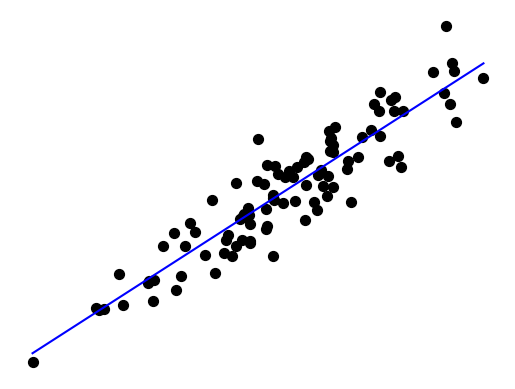

In [57]:

plt.plot(x_line,y_line,c="blue")
plt.scatter(x=X,y=y,s=50,c="black")
plt.axis("off")
plt.show()

<br>
<br>

# `#05 Multiple Linear Regression:`

<br>
<br>

In [60]:
import random
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
from sklearn.datasets import make_regression

random.seed(42)
np.random.seed(42)

X,y = make_regression(n_samples=100,n_features=2,random_state=42,noise=40)
X.shape,y.shape

((100, 2), (100,))

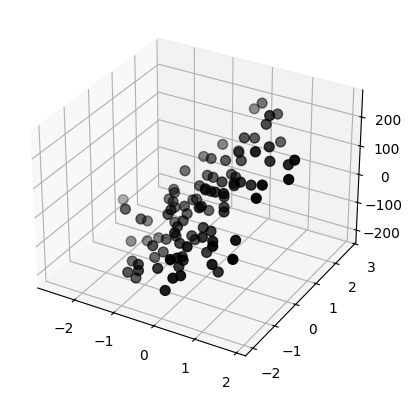

In [61]:

ax = plt.figure()
fig = ax.add_subplot(111,projection="3d")
fig.scatter(X[:,0],X[:,1],y,c="black",marker="o",s=50)
plt.show()

In [62]:


from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=80,random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 2)
y_train shape: (80,)
X_test shape: (20, 2)
y_test shape: (20,)


In [63]:

model = SGDRegressor(
    loss="squared_error",
    penalty="l2",
    alpha=0.1, # lamda in l2 
    eta0=0.01, # learning rate
    verbose=True
)

model.fit(X_train,y_train)

-- Epoch 1
Norm: 28.64, NNZs: 2, Bias: -3.868888, T: 80, Avg. loss: 4835.753163
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.72, NNZs: 2, Bias: -4.592919, T: 160, Avg. loss: 3261.932856
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 54.25, NNZs: 2, Bias: -4.837118, T: 240, Avg. loss: 2486.768534
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 62.12, NNZs: 2, Bias: -4.902800, T: 320, Avg. loss: 2026.012469
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 68.16, NNZs: 2, Bias: -4.823536, T: 400, Avg. loss: 1727.143141
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 72.98, NNZs: 2, Bias: -4.700545, T: 480, Avg. loss: 1525.246292
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 76.90, NNZs: 2, Bias: -4.527150, T: 560, Avg. loss: 1382.120193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 80.02, NNZs: 2, Bias: -4.284901, T: 640, Avg. loss: 1277.281240
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 82.63, NNZs: 2, Bias: -4.111741, T: 720, Avg. loss: 1202

,loss,'squared_error'
,penalty,'l2'
,alpha,0.1
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,True
,epsilon,0.1
,random_state,None


In [64]:

y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.7747647919852706

In [65]:

y_pred = model.predict(X_train)
r2_score(y_train,y_pred)

0.855386835705617

In [66]:
y.shape

(100,)

In [67]:
""" 
# total row 100, 
# to draw a surface we need meshgrid.
# in meshGrid, we need give x_line,y_line value it's give value of a surface(2D).
# as in 1D we have, 100 value we need (50,50) values 
# where xGrid contain the value of x coordinate
# where, yGrid contain the value of y coordinate
"""
# visulization the plot:, value should be, y.shape/2 = 100/2 = 50
x_line = np.linspace(min(X_train[:,0]),max(X_train[:,0]),50)
y_line = np.linspace(min(X_train[:,1]),max(X_train[:,1]),50)

print(x_line.shape)
print(y_line.shape)

xGrid, yGrid = np.meshgrid(x_line,y_line)

print(xGrid.shape)
print(yGrid.shape)


(50,)
(50,)
(50, 50)
(50, 50)


In [68]:

z = model.intercept_ + model.coef_[0]*xGrid + model.coef_[1]*yGrid
z.shape

(50, 50)

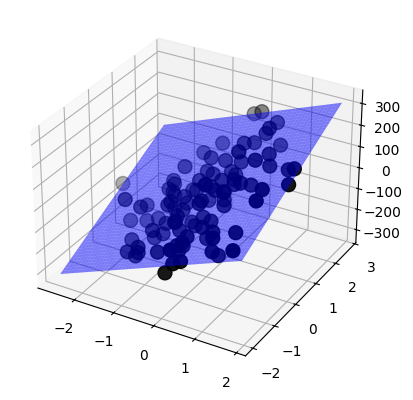

In [69]:
#%matplotlib widget
ax = plt.figure()
fig = ax.add_subplot(111,projection="3d")
fig.plot_surface(xGrid,yGrid,z,color="blue",alpha=0.5)
fig.scatter(X[:,0],X[:,1],y,c="black",marker="o",s=100)
plt.show()


In [76]:

# import plotly.graph_objects as go 

# surface = go.Surface(
#     x=xGrid,
#     y=yGrid,
#     z=z,
#     colorscale="Blues",
#     name="surface"
# )

# scatter = go.Scatter3d(
#     x=X[:,0],
#     y=X[:,1],
#     z = z,
#     mode="markers",
#     marker=dict(
#         color='black',
#         size=200,
#         symbol='circle'
#     ),
#     name="Data Point"
# )


# fig = go.Figure([surface,scatter])

# fig.update_layout(
#     title='3D Surface with Scatter Points',
#     scene=dict(
#         xaxis_title='X Axis',
#         yaxis_title='Y Axis',
#         zaxis_title='Z Axis',
#         camera=dict(
#             eye=dict(x=1.5, y=1.5, z=1.5)  
#         )
#     ),
#     width=800,
#     height=600
# )

# fig.show()


<br>
<br>

# `#06 Logistics Regression:`

<br>
<br>

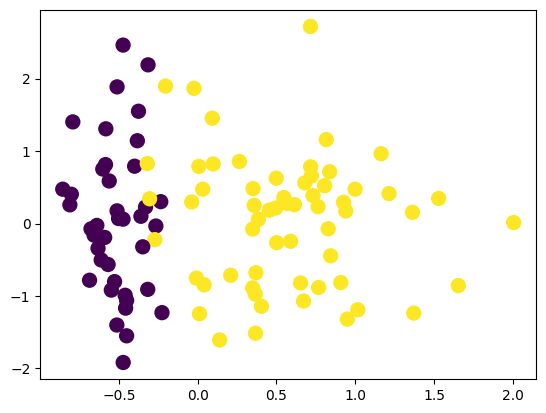

In [79]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,auc
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score

X,y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
    #noise: 
    class_sep=0.55, # distance between two classes
    weights=[0.4,0.6] #imbalance 
)
plt.scatter(x=X[:,0],y=X[:,1],c=y,s=100)
plt.show()

In [80]:

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=80,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [81]:

model = SGDClassifier(
    loss="log_loss", # binary cross entrophy loss
    penalty="l2",
    eta0=0.01,
    tol=1e-6,
    early_stopping=True,
    verbose=True
)
model.fit(X_train,y_train)

-- Epoch 1
Norm: 33.34, NNZs: 2, Bias: -5.656411, T: 72, Avg. loss: 0.911949
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.81, NNZs: 2, Bias: -1.611533, T: 144, Avg. loss: 0.601164
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 37.93, NNZs: 2, Bias: 13.994672, T: 216, Avg. loss: 0.137661
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 42.01, NNZs: 2, Bias: 11.701513, T: 288, Avg. loss: 0.275145
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 40.51, NNZs: 2, Bias: 13.702056, T: 360, Avg. loss: 0.150999
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 44.76, NNZs: 2, Bias: 1.983071, T: 432, Avg. loss: 0.390113
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 42.59, NNZs: 2, Bias: 7.219358, T: 504, Avg. loss: 0.283839
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 38.66, NNZs: 2, Bias: 13.941284, T: 576, Avg. loss: 0.078522
Total training time: 0.07 seconds.
Convergence after 8 epochs took 0.07 seconds


,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-06
,shuffle,True
,verbose,True
,epsilon,0.1
,n_jobs,None


In [82]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) 

0.7

In [83]:
y_pred = model.predict(X_train)
accuracy_score(y_train,y_pred) 

0.95

In [84]:
conf = confusion_matrix(y_train,y_pred)
conf

array([[28,  4],
       [ 0, 48]])

In [85]:

print("precision_sore: ",precision_score(y_train,y_pred))
print("recall_score: ",recall_score(y_train,y_pred))
print("f1 score: ",f1_score(y_train,y_pred))

precision_sore:  0.9230769230769231
recall_score:  1.0
f1 score:  0.96


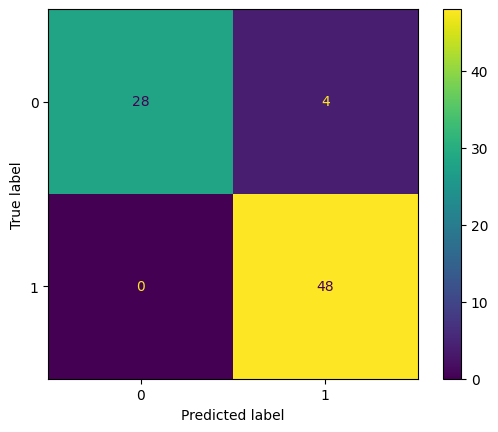

In [86]:

ConfusionMatrixDisplay(confusion_matrix=conf).plot()
plt.show()


<Axes: >

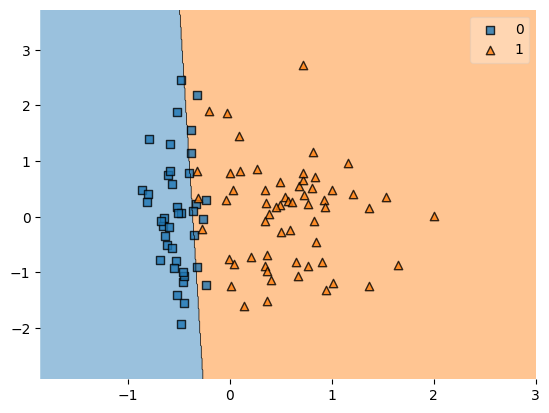

In [87]:
plot_decision_regions(X,y,model)

In [88]:
roc = roc_curve(y_train,y_pred)
roc 

(array([0.   , 0.125, 1.   ]), array([0., 1., 1.]), array([inf,  1.,  0.]))

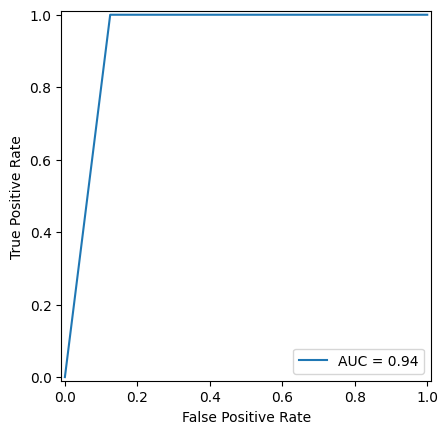

In [89]:

#roc:
fpr,tpr,theshold = roc 

# auc: Area Under the Curve
roc_auc = auc(fpr,tpr)

# display the roc: 
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

<br>
<br>

# `#7 Logistics Regression from Scartch:`

<br>
<br>

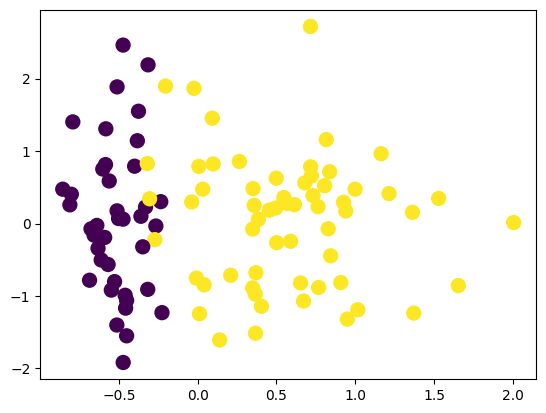

In [90]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 

X,y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
    #noise: 
    class_sep=0.55, # distance between two classes
    weights=[0.4,0.6] #imbalance 
)
plt.scatter(x=X[:,0],y=X[:,1],c=y,s=100)
plt.show()

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((80, 2), (20, 2), (80,), (20,))

In [92]:


def sigmoid(x):
    return 1/(1+np.exp(-x))

def binary_cross_entrophy(y_true,y_pred):
    theshold = 1e-15
    y_pred = np.clip(y_pred,theshold,(1-theshold))
    return -np.mean((y_true * np.log(y_pred)) + ((1-y_true)*(np.log(1-y_pred))))


def logistics_regression(X,y,lr=0.01,num_epoch=100):
    num_features = X.shape[1]
    
    # weith and bias initialization:
    #weights = np.random.normal(loc=1,scale=0.2,size=num_features)
    weights = np.zeros(num_features)
    bias = 0 
    
    losses = []
    
    for epoch in range(num_epoch):
        
        # forward pass:
        linear_model = np.dot(X,weights) + bias
        y_pred = sigmoid(linear_model)
        
        #loss:
        loss = binary_cross_entrophy(y,y_pred)
        losses.append(loss)
        
        # calculate gradient:
        error = y_pred-y
        dw = np.dot(X.T,error)/len(y)
        db = np.sum(error)/len(y)
    
        #update weights ans bias:
        weights -= lr*dw 
        bias -= lr*db
        
        print(f"Epoch: {epoch+1},Loss: {loss:.4f}")

    return weights,bias, losses 

weights, bias, losses = logistics_regression(X_train,y_train,lr=0.1,num_epoch=100)


Epoch: 1,Loss: 0.6931
Epoch: 2,Loss: 0.6849
Epoch: 3,Loss: 0.6769
Epoch: 4,Loss: 0.6692
Epoch: 5,Loss: 0.6616
Epoch: 6,Loss: 0.6543
Epoch: 7,Loss: 0.6471
Epoch: 8,Loss: 0.6402
Epoch: 9,Loss: 0.6335
Epoch: 10,Loss: 0.6269
Epoch: 11,Loss: 0.6205
Epoch: 12,Loss: 0.6143
Epoch: 13,Loss: 0.6082
Epoch: 14,Loss: 0.6023
Epoch: 15,Loss: 0.5966
Epoch: 16,Loss: 0.5909
Epoch: 17,Loss: 0.5855
Epoch: 18,Loss: 0.5801
Epoch: 19,Loss: 0.5749
Epoch: 20,Loss: 0.5698
Epoch: 21,Loss: 0.5649
Epoch: 22,Loss: 0.5600
Epoch: 23,Loss: 0.5553
Epoch: 24,Loss: 0.5507
Epoch: 25,Loss: 0.5461
Epoch: 26,Loss: 0.5417
Epoch: 27,Loss: 0.5374
Epoch: 28,Loss: 0.5332
Epoch: 29,Loss: 0.5290
Epoch: 30,Loss: 0.5250
Epoch: 31,Loss: 0.5210
Epoch: 32,Loss: 0.5171
Epoch: 33,Loss: 0.5133
Epoch: 34,Loss: 0.5096
Epoch: 35,Loss: 0.5059
Epoch: 36,Loss: 0.5023
Epoch: 37,Loss: 0.4988
Epoch: 38,Loss: 0.4953
Epoch: 39,Loss: 0.4920
Epoch: 40,Loss: 0.4886
Epoch: 41,Loss: 0.4854
Epoch: 42,Loss: 0.4822
Epoch: 43,Loss: 0.4790
Epoch: 44,Loss: 0.47

In [93]:

def predict(y,weights,bias,threshold=0.5):
    linear_model = np.dot(y,weights) + bias
    y_pred_prob = sigmoid(linear_model)
    y_pred = (y_pred_prob>=threshold).astype(int)
    return y_pred

y_pred = predict(X_test,weights,bias,0.6)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [94]:

# accuracy: 
np.mean(y_pred==y_test).item() * 100


95.0

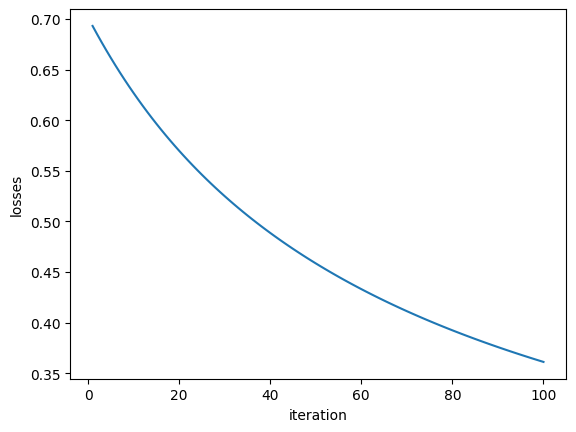

In [95]:

# iteration vs loss:
iteration = [i for i in range(1,101)]
plt.plot(iteration,losses)
plt.xlabel("iteration")
plt.ylabel("losses")
plt.show()

<br>
<br>

# `#8 Differentiation:`

<br>
<br>

### 1. Picard iteration


###  2. Euler (explicit):


### 3. Runge–Kutta 4 (classic RK4):

### 4. Milne predictor–corrector:

In [97]:
import numpy as np
import pandas as pd
from math import factorial

# -------------------------
# 1) Picard Iteration (for y' = f(x,y), integral form)
#    y_{k+1}(x) = y0 + ∫_{x0}^x f(t, y_k(t)) dt
#    We discretize [x0, xf] into m points and use composite trapezoid for integrals.
# -------------------------
def picard_iteration(f, x0, y0, xf, m=50, iterations=5):
    xs = np.linspace(x0, xf, m+1)
    ys_prev = np.full_like(xs, y0, dtype=float)   # initial guess y^0(x) = y0 (constant)
    table = []

    for k in range(iterations):
        ys = np.zeros_like(xs, dtype=float)
        ys[0] = y0
        # compute integral for each grid point using trapezoid with previous iterate
        for i in range(1, len(xs)):
            x_left = xs[:i+1]
            y_prev_vals = ys_prev[:i+1]
            fvals = np.array([f(x_left[j], y_prev_vals[j]) for j in range(len(x_left))])
            # composite trapezoid integral from x0 to xs[i]
            integral = np.trapz(fvals, x_left)
            ys[i] = y0 + integral
        table.append(pd.DataFrame({"x": xs, f"y_iter_{k}": ys}))
        ys_prev = ys.copy()

    # combine table columns
    df = pd.concat(table, axis=1)
    # drop duplicate x columns
    cols = []
    seen = set()
    for c in df.columns:
        if c == "x" and "x" in seen:
            continue
        cols.append(c); seen.add(c)
    df = df[cols]

    return ys, xs, df  # final approx ys at grid xs and dataframe of iterations


# -------------------------
# 2) Euler Method (explicit)
# -------------------------
def euler_method(f, x0, y0, xf, n):
    xs = np.linspace(x0, xf, n+1)
    h = xs[1] - xs[0]
    ys = np.zeros_like(xs)
    ys[0] = y0
    rows = []
    for i in range(n):
        xi = xs[i]; yi = ys[i]
        fi = f(xi, yi)
        y_next = yi + h * fi
        ys[i+1] = y_next
        rows.append({"i": i, "x": xi, "y": yi, "f(x,y)": fi, "y_next": y_next})
    df = pd.DataFrame(rows)
    return ys, xs, df


# -------------------------
# 3) Runge-Kutta 4 (classic RK4)
# -------------------------
def rk4_method(f, x0, y0, xf, n):
    xs = np.linspace(x0, xf, n+1)
    h = xs[1] - xs[0]
    ys = np.zeros_like(xs)
    ys[0] = y0
    rows = []
    for i in range(n):
        xi = xs[i]; yi = ys[i]
        k1 = f(xi, yi)
        k2 = f(xi + h/2, yi + h/2 * k1)
        k3 = f(xi + h/2, yi + h/2 * k2)
        k4 = f(xi + h, yi + h * k3)
        y_next = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        ys[i+1] = y_next
        rows.append({"i": i, "x": xi, "y": yi, "k1": k1, "k2": k2, "k3": k3, "k4": k4, "y_next": y_next})
    df = pd.DataFrame(rows)
    return ys, xs, df


# -------------------------
# 4) Milne's Predictor-Corrector (Milne predictor + Simpson corrector)
#    Predictor:  y_{n+1}^{(p)} = y_{n-3} + (4h/3) * (2 f_{n} - f_{n-1} + 2 f_{n-2})
#    Corrector:  y_{n+1}^{(c)} = y_{n-1} + (h/3) * (f_{n-1} + 4 f_{n} + f_{n+1})
#    (This is the Milne–Simpson pair; starting values y0..y3 computed by RK4)
#    Iteratively correct until convergence or max_iter. (formulas reference: Milne predictor & Simpson corrector). :contentReference[oaicite:1]{index=1}
# -------------------------
def milne_method(f, x0, y0, xf, n, tol=1e-6, max_correct_iter=5):
    if n % 1 != 0:
        raise ValueError("n must be integer")
    xs = np.linspace(x0, xf, n+1)
    h = xs[1] - xs[0]
    ys = np.zeros_like(xs)
    # Need y0..y3 initial values -> use RK4 for first 3 steps
    ys[:1] = y0
    # compute first 3 steps via RK4
    ys_rk, xs_rk, df_rk = rk4_method(f, x0, y0, x0 + 3*h, 3)
    ys[0:4] = ys_rk[0:4]  # y0,y1,y2,y3

    rows = []
    # compute f values for known points
    f_vals = [f(xs[i], ys[i]) for i in range(4)]

    # Start Milne loop from i=3 to n-1 to produce y_{i+1}
    for i in range(3, n):
        # predictor uses indices (i-3, i-2, i-1, i)
        # careful: f_{n-2}, f_{n-1}, f_{n} mapping -> using i-2, i-1, i
        y_pred = ys[i-3] + (4*h/3.0)*(2*f_vals[i-1] - f_vals[i-2] + 2*f_vals[i])
        # now compute f at predicted point
        f_pred = f(xs[i+1], y_pred)

        # corrector (Simpson corrector)
        y_corr = ys[i-1] + (h/3.0)*(f_vals[i-1] + 4*f_vals[i] + f_pred)

        # optionally iterate corrector (use updated f_pred each time)
        iter_count = 0
        while abs(y_corr - y_pred) > tol and iter_count < max_correct_iter:
            y_pred = y_corr
            f_pred = f(xs[i+1], y_pred)
            y_corr = ys[i-1] + (h/3.0)*(f_vals[i-1] + 4*f_vals[i] + f_pred)
            iter_count += 1

        ys[i+1] = y_corr
        f_vals.append(f(xs[i+1], ys[i+1]))
        rows.append({
            "n": i, "x_n": xs[i], "y_n": ys[i], 
            "y_pred": y_pred, "y_corr": y_corr, "correct_iters": iter_count
        })

    df = pd.DataFrame(rows)
    return ys, xs, df


# -------------------------
# Example usage for all methods on the same ODE:
#   Example ODE: y' = (x + y)/2, y(0)=1 ; compute on [0,2]
# -------------------------
if __name__ == "__main__":
    # define example ODE
    def f(x, y):
        return 0.5*(x + y)

    x0 = 0.0
    y0 = 1.0
    xf = 2.0
    n = 20   # steps for single-step methods

    # Picard (note: Picard cost increases with grid size and iterations)
    ys_pic, xs_pic, df_pic = picard_iteration(f, x0, y0, xf, m=40, iterations=6)
    print("Picard last values (grid):\n", pd.DataFrame({"x": xs_pic, "y_pic": ys_pic}).head())

    # Euler
    ys_eu, xs_eu, df_eu = euler_method(f, x0, y0, xf, n)
    print("\nEuler final y:", ys_eu[-1])
    print(df_eu.head())

    # RK4
    ys_rk4, xs_rk4, df_rk4 = rk4_method(f, x0, y0, xf, n)
    print("\nRK4 final y:", ys_rk4[-1])
    print(df_rk4.head())

    # Milne (needs n >= 4)
    ys_milne, xs_milne, df_milne = milne_method(f, x0, y0, xf, n)
    print("\nMilne final y:", ys_milne[-1])
    print(df_milne.head())


Picard last values (grid):
       x     y_pic
0  0.00  1.000000
1  0.05  1.025949
2  0.10  1.053822
3  0.15  1.083665
4  0.20  1.115530

Euler final y: 3.9598931154332613
   i    x         y    f(x,y)    y_next
0  0  0.0  1.000000  0.500000  1.050000
1  1  0.1  1.050000  0.575000  1.107500
2  2  0.2  1.107500  0.653750  1.172875
3  3  0.3  1.172875  0.736438  1.246519
4  4  0.4  1.246519  0.823259  1.328845

RK4 final y: 4.154845077969001
   i    x         y        k1        k2        k3        k4    y_next
0  0  0.0  1.000000  0.500000  0.537500  0.538438  0.576922  1.053813
1  1  0.1  1.053813  0.576907  0.616329  0.617315  0.657772  1.115513
2  2  0.2  1.115513  0.657756  0.699200  0.700236  0.742768  1.185503
3  3  0.3  1.185503  0.742751  0.786320  0.787409  0.832122  1.264208
4  4  0.4  1.264208  0.832104  0.877907  0.879052  0.926057  1.352076

Milne final y: 4.154845737545762
   n  x_n       y_n    y_pred    y_corr  correct_iters
0  3  0.3  1.185503  1.264208  1.264208         

/tmp/ipykernel_35852/913398882.py:24: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.

